In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# pytorch

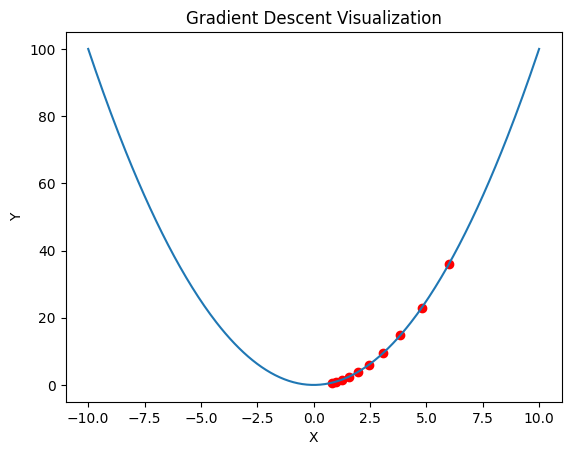

In [6]:

def func(x):
    return x**2

xDatas=[]
x= torch.tensor(6. , requires_grad= True)
n= 10
eta= .1
for i in range (0, n):
    xDatas.append(x.data.item())
    func(x).backward()
    x.data -= eta * x.grad
    x.grad.zero_()
yDatas=[func(torch.tensor(x).item()) for x in xDatas]

# Plot of y=x**2
xList= torch.linspace(-10, 10, 300)
yList= func(xList)
plt.plot(xList, yList)
plt.scatter(xDatas, yDatas, color= 'red')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gradient Descent Visualization")
plt.show()
    

Converged at step 44: gradient = 0.009831


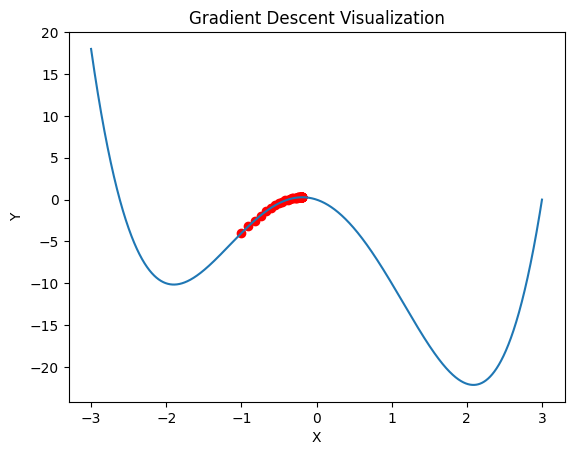

In [49]:

def func(x):
    return x**4 - 8*x**2 - 3*x


xDatas=[]
x= torch.tensor(-1. , requires_grad= True)
n= 1000
eta= .01
gradient_threshold= .01

for i in range (n):
    xDatas.append(x.data.item())
    func(x).backward()
    if abs(x.grad.item()) < gradient_threshold:
        print(f"Converged at step {i}: gradient = {x.grad.item():.6f}")
        break
    with torch.no_grad():
        x.data += eta * x.grad
        x.grad.zero_()
yDatas=[func(torch.tensor(x).item()) for x in xDatas]

# Plot of y=x**2
xList= torch.linspace(-3, 3, 3000)
yList= func(xList)
plt.plot(xList, yList, label= "f(x) = x^4 - 8*x^2 - 3*x")
plt.scatter(xDatas, yDatas, color= 'red')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gradient Descent Visualization")
plt.show()
    

In [3]:
class Neuron:
    def __init__(self, n, af='linear'):
        self.w= torch.randn(n, requires_grad= True)
        self.b= torch.randn(1, requires_grad= True)
        self.af= af
    def __call__(self, X):
        z= self.w @ X + self.b
        print(f'w: {self.w}')
        print(f'b: {self.b.item()}')
        print(f'z: {self.w}')
        if self.af == 'linear':
            return self.linear(z)
        elif self.af == 'step':
            return self.step(z)
        elif self.af == 'relu':
            return self.relu(z)
        elif self.af == 'sigmoid':
            return self.sigmoid(z)
        elif self.af == 'tanh':
            return self.tanh(z)
        else:
            raise ValueError(f'Unsopported activation function {self.af}')

    
    def linear(self, x):
        return x
    def step(self, x):
        return (x>0).float()
    def relu(self, x):
        return torch.relu(x)        #return torch.maximum(x, torch.tensor(0.0)) 
    def sigmoid(self, x):
        return torch.sigmoid(x)     #return 1 / (1 + torch.exp(-x))
    def tanh(self, x):
        return torch.tanh(x)

In [4]:
x= torch.tensor([1, 5, 8, .65, 6])
y = torch.tensor([.4])
neuron1 = Neuron(5,'tanh')
y_pred = neuron1(x)
mse_loss= (y_pred - y) ** 2
print(f'y_pred: {y_pred.item()}')
print(f'mse_loss: {mse_loss.item()}')

w: tensor([-0.6999, -1.4455, -0.8851, -0.6433, -0.0702], requires_grad=True)
b: -0.15341117978096008
z: tensor([-0.6999, -1.4455, -0.8851, -0.6433, -0.0702], requires_grad=True)
y_pred: -1.0
mse_loss: 1.959999918937683


In [2]:
class Neuron:
    def __init__(self, n_x, n_y, af='linear'):
        self.w= torch.randn(n_y, n_x, requires_grad= True)
        self.b= torch.randn(n_y, requires_grad= True)
        self.af= af
    
    def forward(self, X):
        z= self.w @ X + self.b
        print(f'w: {self.w.detach().numpy()}')
        print(f'b: {self.b.detach().numpy()}')
        print(f'z: {z.detach().numpy()}')
        
        if self.af == 'linear':
            return self.linear(z)
        elif self.af == 'step':
            return self.step(z)
        elif self.af == 'relu':
            return self.relu(z)
        elif self.af == 'sigmoid':
            return self.sigmoid(z)
        elif self.af == 'tanh':
            return self.tanh(z)
        else:
            raise ValueError(f'Unsopported activation function {self.af}')        
    
    def __call__(self, X, y=None, lr=None):
        yp = self.forward(X)
        if y is not None:
            print(f"yt (y true) : {y.detach().numpy()}")
        print(f"yp (y predict) : {yp.detach().numpy()}")

        if y is not None and lr is not None:
            loss= self.compute_loss(yp, y)
            loss.backward()
            self.update_params(lr)
            return yp , loss
        else:
            return yp
            

    def compute_loss(self, yp, yt):
        return ((yp - yt)**2).mean()
        
    def linear(self, x):
        return x
    def step(self, x):
        return (x>0).float()
    def relu(self, x):
        return torch.relu(x)        #return torch.maximum(x, torch.tensor(0.0)) 
    def sigmoid(self, x):
        return torch.sigmoid(x)     #return 1 / (1 + torch.exp(-x))
    def tanh(self, x):
        return torch.tanh(x)

    def update_params(self, lr):
        with torch.no_grad():
            self.w -= lr * self.w.grad
            self.b -= lr * self.b.grad
            self.zero_grad()
    def zero_grad(self):
        if self.w.grad is not None:
            self.w.grad.zero_()
        if self.b.grad is not None:
            self.b.grad.zero_()        

In [4]:
x= torch.tensor([1, 5, 8, .65, 6, 10])
y = torch.tensor([6., 3.2])
neuron1 = Neuron(6, 2, 'linear')
y_pred , loss= neuron1(x, y, 0.1)


w: [[-1.1363597   0.26047415  0.7914786  -0.4081556  -1.7477418  -1.5723532 ]
 [ 0.90120757  0.5689543  -1.1997349  -0.5067499   0.35550314  1.6704279 ]]
b: [-0.97848916 -0.62707263]
z: [-20.955935  12.028937]
yt (y true) : [6.  3.2]
yp (y predict) : [-20.955935  12.028937]


In [7]:
print(y_pred , loss)

tensor([0., 0.], grad_fn=<ReluBackward0>) tensor(23.1200, grad_fn=<MeanBackward0>)


In [2]:
import torch.nn as nn

In [11]:
# x= torch.tensor([1, 5, 8, .65, 6, 10])
# y = torch.tensor([6., 3.2])

x= torch.randn(200, 4)
y = torch.randn(200, 2)

model = nn.Linear(in_features=4, out_features=2)
print(f'Bias: {model.bias.detach().numpy()}\nWeights: {model.weight.detach().numpy()}')

yp= model(x)
# print(f'y predict: {yp.detach().numpy()}')

loss_fun = nn.MSELoss()
mse = loss_fun(yp, y)
print(f'MSE : {mse}')


Bias: [-0.11630845  0.19253826]
Weights: [[ 0.3475988  -0.07792199 -0.41012943  0.34933132]
 [-0.20886415  0.07614779  0.3874904  -0.40110725]]
MSE : 1.5395617485046387


In [18]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

housing= fetch_california_housing()
m, n= housing.data.shape

X = torch.tensor(housing.data, dtype=torch.float32)
y = torch.tensor(housing.target, dtype=torch.float32).reshape(-1, 1)

scaler = StandardScaler()
X = torch.tensor(scaler.fit_transform(housing.data), dtype=torch.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=42)


model = nn.Linear(n, 1)
loss_fun = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

for epoch in range(100):
    yp = model(X_train)
    mse = loss_fun(yp, y_train)
    # print(f"{model.bias.detach().numpy()}  {model.weight.detach().numpy()}   {mse.item()}")
    # print(f"{mse.item()}")
    mse.backward()
    optimizer.step()
    optimizer.zero_grad()

y_predict = model(X_test)
l1_loss = nn.functional.l1_loss(y_predict, y_test)

l1_loss.item()

0.5373618006706238

# CNN

In [3]:
from sklearn.datasets import load_sample_images

In [71]:
dataset= np.array(load_sample_images().images, dtype=np.float32)
batch_size, height, width, channels = dataset.shape

filters_test = np.zeros(shape= (7, 7, channels, 2), dtype=np.float32)
filters_test[:, 3, :, 0] = 1 # vertical line  # All rows, column 3, all channels, filter 0
filters_test[3, :, :, 1] = 1 # horizontal line  # Row 3, all columns, all channels, filter 1

# convolution = tf.nn.conv2d(dataset, filters_test, padding= "SAME", strides=[1,2,2,1])  #strides = [batch_stride, height_stride, width_stride, channel_stride]
convolution = tf.nn.conv2d(dataset, filters_test, padding= "SAME", strides=1)
convolution_np = convolution.numpy()

In [72]:
dataset.shape  # Output: (2, 427, 640, 3) - 2 images, 427x640 pixels, 3 color channels
convolution.shape  # output: ([2, 427, 640, 2]) batch_size, output_height, output_width, num_feature_maps
convolution_np.shape # output: ([2, 427, 640, 2]) batch_size, output_height, output_width, num_feature_maps

(2, 427, 640, 2)

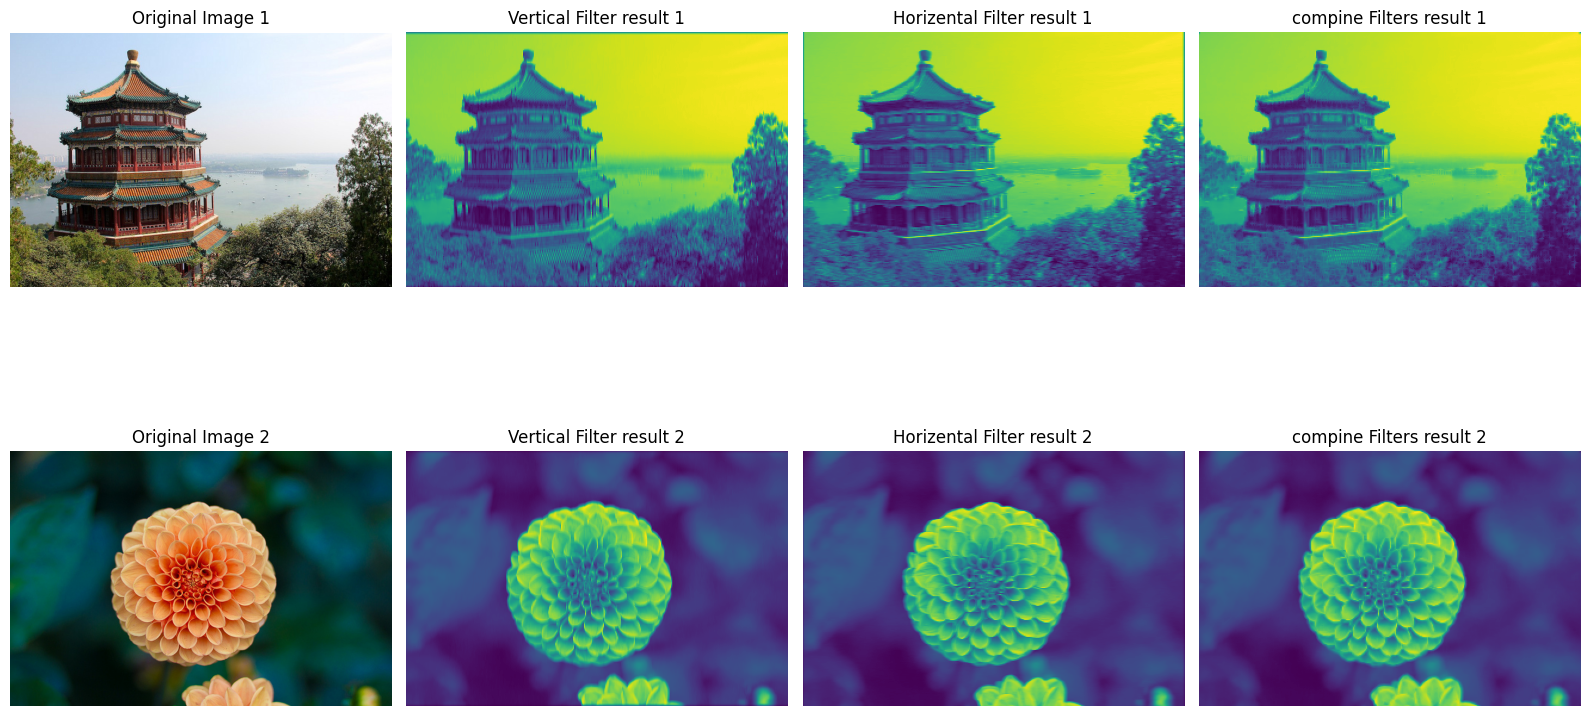

In [70]:
fix, axes = plt.subplots(batch_size, 4, figsize =(16, 10))  # figsize=(16, 4 * batch_size)
for i in range(batch_size):
    # show Original Image
    axes[i, 0].imshow(dataset[i].astype(np.int32))  # astype(np.uint8)
    axes[i, 0].set_title(f'Original Image {i+1}')
    axes[i, 0].axis('off')
    
    # show Filter 1 result
    axes[i, 1].imshow(convolution_np[i, :, :, 0].astype(np.float32))
    axes[i, 1].set_title(f'Vertical Filter result {i+1}')
    axes[i, 1].axis('off')
    
    # show Filter 2 result
    axes[i, 2].imshow(convolution_np[i, :, :, 1].astype(np.int32))
    # axes[i, 2].imshow(convolution_np[i, :, :, 1], cmap='gray')
    axes[i, 2].set_title(f'Horizental Filter result {i+1}')
    axes[i, 2].axis('off')

    # show compine Filters result
    axes[i, 3].imshow(np.maximum(convolution_np[i, :, :, 0], convolution_np[i, :, :, 1]).astype(np.float32))
    # axes[i, 2].imshow(convolution_np[i, :, :, 1], cmap='gray')
    axes[i, 3].set_title(f'compine Filters result {i+1}')
    axes[i, 3].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
plt.imshow(filters_test[:, :, 0, 1])

# """
# filters_test[:, :, 0, 1]
# [
# All rows (height dimension), ==> :
# All columns (width dimension), ==> :
# Channel index: 0 (first channel - Red), ==> 0 , 1 (second channel - Green), 2 (third channel - Blu)
# Filter index: 0 (first filter) ==> 1
# ]
# """

(-0.5, 6.5, 6.5, -0.5)

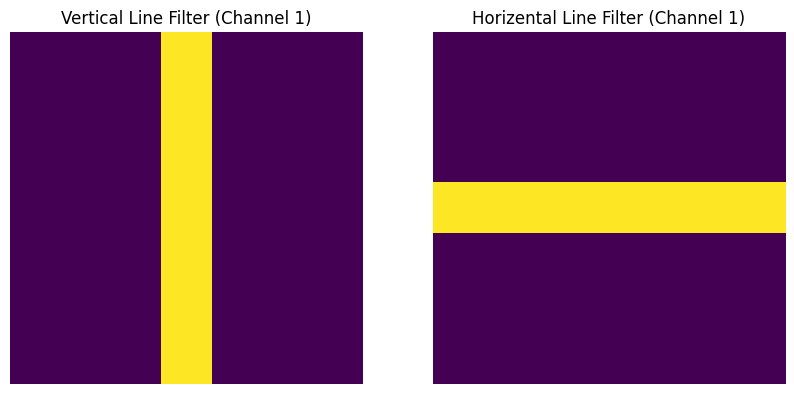

In [90]:
fig, axes = plt.subplots(1, 2, figsize= (10,5))
axes[0].imshow(filters_test[:, :, 0, 0])
axes[0].set_title('Vertical Line Filter (Channel 1)')
axes[0].axis('off')

axes[1].imshow(filters_test[:, :, 0, 1])
axes[1].set_title('Horizental Line Filter (Channel 1)')
axes[1].axis('off')
